# Initial EDA of HR Data for digging deeper into possible attrition prediction model
Since we did not find data of OCEAN personality that included any attrition information, now we are looking into some available HR datasets.
The idea is to dig deeper into the data and figure out how to build an attrition prediction model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## HR Dataset

In [2]:
#We begin with the HR Dataset
df1 = pd.read_csv('DATA_ATTRITION_AND_HR/HRDataset_v14.csv')

In [3]:
df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### HR Dataset information
You can find the full dataset column description here: https://rpubs.com/rhuebner/hr_codebook_v14.<br>
Let's investigate some of the data a bit more. Some correlations will help up learn more about the data.

In [23]:
df1.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [7]:
df1.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,1.000000,0.048058,-0.043851,0.035914,0.073750,0.107406,-0.691348,0.046805,-0.115319,0.092389,-0.036488,0.026858,0.090236,-0.589664,-0.146967,-0.043730,0.495513,-0.025278
MarriedID,0.048058,1.000000,0.164044,-0.024199,0.085619,-0.119932,-0.058362,-0.012708,0.026165,0.077028,-0.027334,-0.041147,-0.094002,-0.091178,-0.126191,0.061278,0.002875,0.096086
MaritalStatusID,-0.043851,0.164044,1.000000,-0.030236,0.114630,0.012768,0.044693,0.041117,-0.070291,0.099367,0.021923,0.010620,0.023065,0.033249,0.002068,-0.051093,-0.096500,0.018722
GenderID,0.035914,-0.024199,-0.030236,1.000000,-0.032440,-0.038838,-0.054915,0.031493,0.056097,-0.015741,-0.081612,0.048539,-0.043218,-0.036276,-0.044603,0.087073,0.080329,-0.004577
EmpStatusID,0.073750,0.085619,0.114630,-0.032440,1.000000,0.088711,-0.071208,0.189025,-0.110912,0.948058,0.221221,-0.150527,0.234222,0.024305,0.010553,-0.166560,0.078318,0.091834
DeptID,0.107406,-0.119932,0.012768,-0.038838,0.088711,1.000000,-0.084811,-0.129998,-0.448132,0.065922,0.030294,0.290023,0.550240,-0.094940,0.031997,-0.785101,0.124630,0.053308
PerfScoreID,-0.691348,-0.058362,0.044693,-0.054915,-0.071208,-0.084811,1.000000,0.012315,0.130903,-0.089061,0.005227,-0.058350,-0.060552,0.544927,0.303579,0.045677,-0.734728,0.046629
FromDiversityJobFairID,0.046805,-0.012708,0.041117,0.031493,0.189025,-0.129998,0.012315,1.000000,0.041248,0.147717,0.015085,-0.028314,0.007570,-0.013040,-0.034468,0.031393,0.042532,0.062640
Salary,-0.115319,0.026165,-0.070291,0.056097,-0.110912,-0.448132,0.130903,0.041248,1.000000,-0.093994,-0.130563,-0.037242,-0.435406,0.064966,0.062718,0.508333,-0.069443,0.082382
Termd,0.092389,0.077028,0.099367,-0.015741,0.948058,0.065922,-0.089061,0.147717,-0.093994,1.000000,0.147042,-0.139006,0.209113,-0.017543,-0.004732,-0.147429,0.136379,0.098274


<AxesSubplot:>

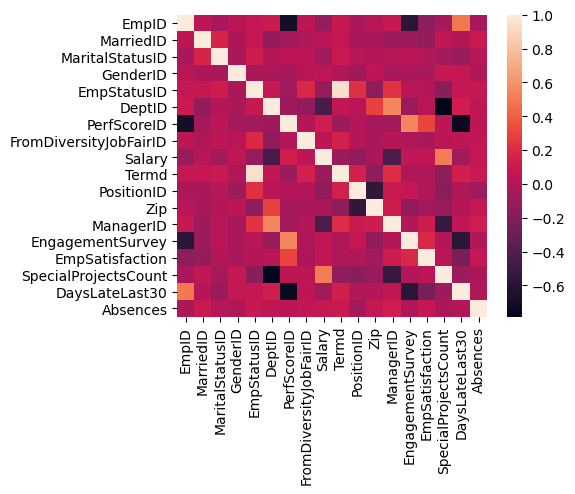

In [84]:
fig=plt.figure(figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
sns.heatmap(df1.corr())

### Some base insights
The biggest interesting correlations we can see are:<br>
There is a negative correlation between lateness the last 30 days and the engagement survey score. Meaning that the<br>
more engaged people are at work, the less likely they are to be late for work.<br>
Also a negative correlation between performance score and lateness, the worse performes, the more common it is for<br>
them to be late.
Also there is a possitive correlation between performance score and engagement, which is expected.<br>
The salary and special projects count possitive correlation is interesting, meaning the higher your salary the<br>
more extra projects people take on.<br>

### General insights on this dataset
This is an interesting dataset to build predictive models regarding engagement, performance and abstencionism. The only<br>
issue is that it would be very company specific, and the egagemnt metric is dependant on the specific survey they do.<br>
There are no particularly new insights from the HR world in this dataset.<br>
It would be interesting to investigate some of the categorical data, like the relation we could find from the recruitment<br>
source.

## IBM HR Dataset

In [21]:
df2 = pd.read_csv('DATA_ATTRITION_AND_HR/IBM-HR-Employee-Attrition.csv')

In [48]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### IBM HR Dataset information
This dataset came without the column details, and there are some columns that I could not find their meaning, so we will ignore those for now.
The info we have on this dataset is:<br>
Attrition: Did the person quit the company, yes or no.<br> 
Age: the age of the person in the observation<br>
BusinessTravel: does the person travel for work, frequently, rarely or non.<br>
Department: Which department the person belogs to.<br>
DistanceFromHome: How far the person is from the office.<br>
Education: Education level from 1 = High School to 5 = PhD. <br>
EducationField> Field of study.<br>
RelationshipSatisfaction: How satisfied are people with their work relationships. <br>
EnvironmentSatisfaction: Level of satisfaction with the working environment.<br>
Gender: Male of Female.<br>
JobInvolvement: Level of job engagement.<br>
JobLevel: Hirearchical level of the job.<br>
JobRole: Name of role.<br>
JobSatisfaction: Level of satisfacion with work.<br>
MaritalStatus: Single, Married or Divorced.<br>
MonthlyIncome: Salary per month.<br>
NumCompaniesWorked: Number of companies a person has worked for.<br>
OverTime: Does the person work overtime, yes or no.<br>
PercentSalaryHike: Percentage salary has increased over time.<br>
PerformanceRating: Performance rating of the person.<br>
StockOptionLevel: Different level of stock options from 0 to 3. <br>
TotalWorkingYears: How many years has the person been in the workforce. <br>
TrainingTimesLastYear: How many trainings the persona attended last year.<br>
WorkLifeBalance: From 1 to 4 how they score their work life balance.<br>
YearsAtCompany: Years person worked / has worked for the company.<br>
YearsInCurrentRole: Years person spent on last role / has spent on current role.<br>
YearsSinceLastPromotion: How many years past since the last promotion.<br>
YearsWithCurrManager: How many years the person has been with the current manager.<br>
<br>
Let us investigate the data some more.

In [49]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [50]:
df2.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

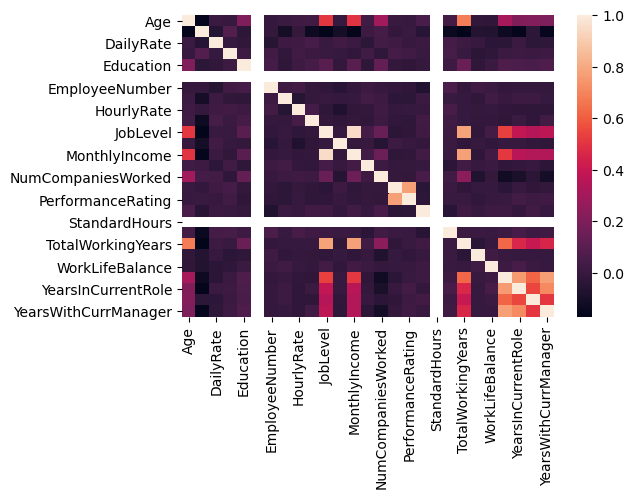

In [85]:
fig2=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
sns.heatmap(df2.corr())

Although there is a lot of interesting information in the above heatmap, I want to be able to correlate with attrition, and since in the dataset this is a categorical variable, let us swicth it to a numeric binary one, 1 for yes and 0 for no.

In [58]:
# Changing yes / no in attrition into a 1, 0 variable
df2['Attrition'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [59]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Investigating the correlations with attrition.

In [73]:
df2.corrwith(df2['Attrition'], axis=0, drop=False, method='pearson')

Age                        -0.159205
Attrition                   1.000000
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
d

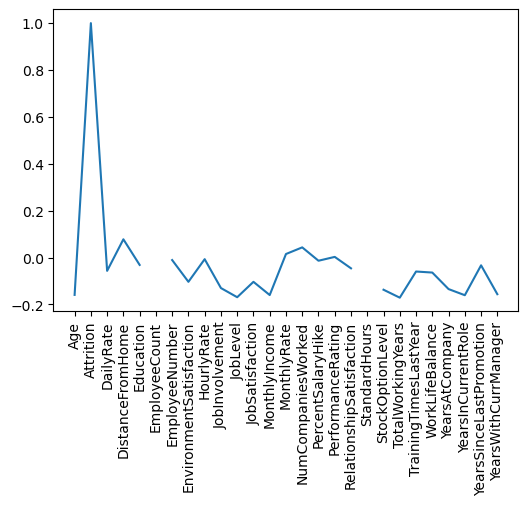

In [86]:
attrition_corr = df2.corrwith(df2['Attrition'], axis=0, drop=False, method='pearson')
fig3=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
plt.xticks(rotation=90)
plt.plot(attrition_corr)


### About the Attrition correlation
In this dataset, although we do have some interesting correlations, when we plot them against attrition we find, at best a weak negative correlation between attrition and TotalWorkingYears -0.171063. Now, this does not mean we could not build an interesting model, just that it is very likely that the information we have on this dataset is not a good predictor of attrition.